In [1]:
# imports

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets, metrics 
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from sklearn.linear_model import Ridge, Lasso, LassoCV

import statsmodels.api as sm

In [2]:
# suppressing scientific notation for pandas 

pd.set_option('display.float_format', lambda x: '%.3f' % x)

### Reading in cleaned datasets

In [3]:
ames = pd.read_pickle('../data/ames_clean.pkl')
ames_test = pd.read_pickle('../data/ames_test_clean.pkl')

In [4]:
ames.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Basement Quality_average,Basement Quality_none_or_below_average,Bsmt Exposure_Gd,Bsmt Exposure_Mn,Bsmt Exposure_No,Bsmt Exposure_no_basement,Basement Finish 1_average,Basement Finish 1_below_average,Basement Finish 1_below_average_unfinished,Basement Finish 1_no_basement
0,109,533352170,60,RL,69.049,13517,Pave,NaN,IR1,Lvl,...,1,0,0,0,1,0,0,0,0,0
1,544,531379050,60,RL,43.000,11492,Pave,NaN,IR1,Lvl,...,0,0,0,0,1,0,0,0,0,0
2,153,535304180,20,RL,68.000,7922,Pave,NaN,Reg,Lvl,...,1,0,0,0,1,0,0,0,0,0
3,318,916386060,60,RL,73.000,9802,Pave,NaN,Reg,Lvl,...,0,0,0,0,1,0,0,0,1,0
4,255,906425045,50,RL,82.000,14235,Pave,NaN,IR1,Lvl,...,1,0,0,0,1,0,0,0,1,0


In [5]:
ames_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Basement Quality_average,Basement Quality_none_or_below_average,Bsmt Exposure_Gd,Bsmt Exposure_Mn,Bsmt Exposure_No,Bsmt Exposure_no_basement,Basement Finish 1_average,Basement Finish 1_below_average,Basement Finish 1_below_average_unfinished,Basement Finish 1_no_basement
0,2658,902301120,190,RM,69.000,9142,Pave,Grvl,Reg,Lvl,...,1,0,0,0,1,0,0,0,1,0
1,2718,905108090,90,RL,69.546,9662,Pave,NaN,IR1,Lvl,...,0,0,0,0,1,0,0,0,1,0
2,2414,528218130,60,RL,58.000,17104,Pave,NaN,IR1,Lvl,...,1,0,0,0,0,0,0,0,0,0
3,1989,902207150,30,RM,60.000,8520,Pave,NaN,Reg,Lvl,...,0,0,0,0,1,0,0,0,1,0
4,625,535105100,20,RL,69.546,9500,Pave,NaN,IR1,Lvl,...,1,0,0,0,1,0,0,1,0,0


In [6]:
ames.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2049 entries, 0 to 2050
Data columns (total 96 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Id                                          2049 non-null   int64  
 1   PID                                         2049 non-null   int64  
 2   MS SubClass                                 2049 non-null   int64  
 3   MS Zoning                                   2049 non-null   object 
 4   Lot Frontage                                2049 non-null   float64
 5   Lot Area                                    2049 non-null   int64  
 6   Street                                      2049 non-null   object 
 7   Alley                                       140 non-null    object 
 8   Lot Shape                                   2049 non-null   object 
 9   Land Contour                                2049 non-null   object 
 10  Utilities   

### Baseline Model 

_This will give me something to compare my future models to as I can then see how they compare to the baseline score._ 

In [7]:
ames_test['SalePrice_bl'] = ames['SalePrice'].mean()
ames_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Basement Quality_none_or_below_average,Bsmt Exposure_Gd,Bsmt Exposure_Mn,Bsmt Exposure_No,Bsmt Exposure_no_basement,Basement Finish 1_average,Basement Finish 1_below_average,Basement Finish 1_below_average_unfinished,Basement Finish 1_no_basement,SalePrice_bl
0,2658,902301120,190,RM,69.000,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,1,0,0,0,1,0,181534.626
1,2718,905108090,90,RL,69.546,9662,Pave,NaN,IR1,Lvl,...,0,0,0,1,0,0,0,1,0,181534.626
2,2414,528218130,60,RL,58.000,17104,Pave,NaN,IR1,Lvl,...,0,0,0,0,0,0,0,0,0,181534.626
3,1989,902207150,30,RM,60.000,8520,Pave,NaN,Reg,Lvl,...,0,0,0,1,0,0,0,1,0,181534.626
4,625,535105100,20,RL,69.546,9500,Pave,NaN,IR1,Lvl,...,0,0,0,1,0,0,1,0,0,181534.626


In [8]:
baseline_model = ames_test[['Id', 'SalePrice_bl']].copy()
baseline_model.head()

,Id,SalePrice_bl
0,2658,181534.626
1,2718,181534.626
2,2414,181534.626
3,1989,181534.626
4,625,181534.626


## _Now to build better models!_

In [9]:
features_num = ['Lot Frontage', 'Lot Area', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Gr Liv Area', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val']

In [10]:
# identify X, y 

X = ames[features_num]
y = ames['SalePrice']

In [11]:
X

,Lot Frontage,Lot Area,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Gr Liv Area,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val
0,69.049,13517,1976,2005,289.000,533.000,0.000,192.000,725.000,725,754,1479,475.000,0,44,0,0,0,0,0
1,43.000,11492,1996,1997,132.000,637.000,0.000,276.000,913.000,913,1209,2122,559.000,0,74,0,0,0,0,0
2,68.000,7922,1953,2007,0.000,731.000,0.000,326.000,1057.000,1057,0,1057,246.000,0,52,0,0,0,0,0
3,73.000,9802,2006,2007,0.000,0.000,0.000,384.000,384.000,744,700,1444,400.000,100,0,0,0,0,0,0
4,82.000,14235,1900,1993,0.000,0.000,0.000,676.000,676.000,831,614,1445,484.000,0,59,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,79.000,11449,2007,2007,0.000,1011.000,0.000,873.000,1884.000,1728,0,1728,520.000,0,276,0,0,0,0,0
2047,69.049,12342,1940,1950,0.000,262.000,0.000,599.000,861.000,861,0,861,539.000,158,0,0,0,0,0,0
2048,57.000,7558,1928,1950,0.000,0.000,0.000,896.000,896.000,1172,741,1913,342.000,0,0,0,0,0,0,0
2049,80.000,10400,1956,1956,0.000,155.000,750.000,295.000,1200.000,1200,0,1200,294.000,0,189,140,0,0,0,0


In [12]:
# train-test split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# scaling X's

ss = StandardScaler()

X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [14]:
# instantiating the model

lr = LinearRegression()

_NOTE: # I tried my first set of prediction without Scaling; I then tried scaling and called the model lr_sc. The predictions changed somewhat and I will continue to use StandardScaler for every model I do now unless something breaks._

_So, I will now call my scaled model just lr._

In [15]:
# fitting my model using scaled data (see note in cell above?)

lr.fit(X_train_sc, y_train)

LinearRegression()

In [16]:
lr.intercept_

181996.92861500918

In [17]:
lr.coef_

array([ -512.74843466,  2264.23883868, 14268.37307057, 13101.99499995,
        9014.05503594,  7057.78791201,   873.17743509,   885.05560404,
        8444.07376974, 14784.13612592, 12438.63499432, 14605.85426951,
       11111.09995468,  5567.77482522,  2269.89457361,  2678.90135273,
         805.59652254,  5670.15198755, -4944.51736148, -9100.36531219])

In [18]:
# creating dataframe to show coefficients for each feature clearly

pd.DataFrame(list(zip(X_train.columns, lr.coef_)))

,0,1
0,Lot Frontage,-512.748
1,Lot Area,2264.239
2,Year Built,14268.373
3,Year Remod/Add,13101.995
4,Mas Vnr Area,9014.055
5,BsmtFin SF 1,7057.788
6,BsmtFin SF 2,873.177
7,Bsmt Unf SF,885.056
8,Total Bsmt SF,8444.074
9,1st Flr SF,14784.136


In [19]:
# make predictions on scaled ames_test columns and adding these predictions to the dataframe 
ames_test['SalePrice_fn'] = lr.predict(ss.transform(ames_test[features_num]))

In [20]:
ames_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Bsmt Exposure_Gd,Bsmt Exposure_Mn,Bsmt Exposure_No,Bsmt Exposure_no_basement,Basement Finish 1_average,Basement Finish 1_below_average,Basement Finish 1_below_average_unfinished,Basement Finish 1_no_basement,SalePrice_bl,SalePrice_fn
0,2658,902301120,190,RM,69.000,9142,Pave,Grvl,Reg,Lvl,...,0,0,1,0,0,0,1,0,181534.626,140685.771
1,2718,905108090,90,RL,69.546,9662,Pave,NaN,IR1,Lvl,...,0,0,1,0,0,0,1,0,181534.626,225796.997
2,2414,528218130,60,RL,58.000,17104,Pave,NaN,IR1,Lvl,...,0,0,0,0,0,0,0,0,181534.626,194323.567
3,1989,902207150,30,RM,60.000,8520,Pave,NaN,Reg,Lvl,...,0,0,1,0,0,0,1,0,181534.626,128493.140
4,625,535105100,20,RL,69.546,9500,Pave,NaN,IR1,Lvl,...,0,0,1,0,0,1,0,0,181534.626,193068.456


In [21]:
# training set score

lr.score(X_train_sc, y_train)

0.7687301465477075

In [22]:
# test set score 

lr.score(X_test_sc, y_test)

0.8231299338712463

In [23]:
# RMSE 

np.sqrt(metrics.mean_squared_error(y_test, lr.predict(X_test_sc)))

32577.805589673284

I will make a new DataFrame with just the Id and SalePrice prediction for this model so that I can submit it. I need to set a column caled `SalePrice` to the `ames_test` Dataframe and set this column equal to these latest prediction so that it will be in the right format for submissions. 

In [24]:
ames_test['SalePrice'] = ames_test['SalePrice_fn']
submission_6 = ames_test[['Id', 'SalePrice']].copy()

In [25]:
pwd

'/Users/emilynaftalin/Data_Science/General Assembly/dsi/projects/project_2/code'

In [26]:
submission_6.to_csv('../submissions/submission_6.csv', index=False)

In [27]:
submission_6.head()

,Id,SalePrice
0,2658,140685.771
1,2718,225796.997
2,2414,194323.567
3,1989,128493.140
4,625,193068.456


### Making functions to simplify 

_KISS_

In [28]:
def standardize(X_train, X_test):
    ss = StandardScaler()
    X_train_sc = pd.DataFrame(ss.fit_transform(X_train))
    X_test_sc = pd.DataFrame(ss.transform(X_test))
    return ss, X_train_sc, X_test_sc

In [29]:
def my_model_metrics(estimator, X_test_sc, y_test):
    r2 = estimator.score(X_test_sc, y_test)
    print(f"R^2 = {r2}")
    rmse = np.sqrt(metrics.mean_squared_error(y_test, estimator.predict(X_test_sc)))
    print(f"RMSE = {rmse}")

In [30]:
def fit_predict_score(estimator, X_train_sc, y_train, X_test_sc, y_test):
    estimator.fit(X_train_sc, y_train)
    r2 = estimator.score(X_test_sc, y_test)
    print(f"R^2 = {r2}")
    rmse = np.sqrt(metrics.mean_squared_error(y_test, estimator.predict(X_test_sc)))
    print(f"RMSE = {rmse}")

### Building models that include more numeric columns

_some cells below are repeats from above for easy reference_

#### Identifying new lists of features to use in models

In [31]:
num_cols = ames.describe().columns
num_cols

Index(['Id', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice',
       'has_garage', 'garage_attached', 'garage_large', 'garage_nice',
       'garage_RFn', 'garage_Unf', 'has_fireplace', 'Basement Quality_average',
       'Basement Quality_none_or_below_average', 'Bsmt Exposure_Gd',
       'Bsmt Exposure_Mn', 'Bsmt Exposure_No', 'Bsmt Exposure_no_basement',
       'Basement Finish 1_average', 'Basement Finish 1_below_ave

In [32]:
features_num = ['Lot Frontage', 'Lot Area', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Gr Liv Area', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val']

In [33]:
continuous_cols = ['Lot Area', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Gr Liv Area','Garage Yr Blt', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'SalePrice']

In [34]:
# discrete variables 

discrete_cols = [x for x in num_cols if x not in continuous_cols]
discrete_cols

['Id',
 'PID',
 'MS SubClass',
 'Lot Frontage',
 'Overall Qual',
 'Overall Cond',
 'Low Qual Fin SF',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 'Garage Cars',
 'Mo Sold',
 'Yr Sold',
 'has_garage',
 'garage_attached',
 'garage_large',
 'garage_nice',
 'garage_RFn',
 'garage_Unf',
 'has_fireplace',
 'Basement Quality_average',
 'Basement Quality_none_or_below_average',
 'Bsmt Exposure_Gd',
 'Bsmt Exposure_Mn',
 'Bsmt Exposure_No',
 'Bsmt Exposure_no_basement',
 'Basement Finish 1_average',
 'Basement Finish 1_below_average',
 'Basement Finish 1_below_average_unfinished',
 'Basement Finish 1_no_basement']

_Figuring out which discrete numeric columns need to be removed because they are misleading -- like Id._

In [35]:
ames['MS SubClass'].unique()

array([ 60,  20,  50, 180, 160,  70, 120, 190,  85,  30,  90,  80,  75,
        45,  40, 150])

In [36]:
for feature in discrete_cols:
    print(f"{feature}: {ames[feature].unique()}")

Id: [109 544 153 ... 916 639  10]
PID: [533352170 531379050 535304180 ... 909253010 535179160 527162130]
MS SubClass: [ 60  20  50 180 160  70 120 190  85  30  90  80  75  45  40 150]
Lot Frontage: [ 69.04886562  43.          68.          73.          82.
 137.          35.          70.          21.          64.
 120.          24.          74.          93.          34.
  80.          71.          72.         109.          40.
 103.         100.          92.          65.          75.
  60.          30.          79.          41.         105.
 107.          81.          36.          63.          32.
  94.          44.          50.          48.          67.
  88.          83.          53.          58.          57.
  52.          87.         134.          56.          54.
 140.          78.          85.          90.          96.
  62.          49.          59.         155.          91.
  61.          86.         128.          77.          42.
  89.          51.          69.          55.    

In [37]:
ames['Bsmt Full Bath'].isnull().sum()

1

In [38]:
ames['Bsmt Full Bath'].fillna(ames['Bsmt Full Bath'].mean(), inplace=True)
ames['Bsmt Half Bath'].fillna(ames['Bsmt Half Bath'].mean(), inplace=True)

In [39]:
ames[discrete_cols].isnull().sum()

Id                                            0
PID                                           0
MS SubClass                                   0
Lot Frontage                                  0
Overall Qual                                  0
Overall Cond                                  0
Low Qual Fin SF                               0
Bsmt Full Bath                                0
Bsmt Half Bath                                0
Full Bath                                     0
Half Bath                                     0
Bedroom AbvGr                                 0
Kitchen AbvGr                                 0
TotRms AbvGrd                                 0
Fireplaces                                    0
Garage Cars                                   0
Mo Sold                                       0
Yr Sold                                       0
has_garage                                    0
garage_attached                               0
garage_large                            

In [40]:
# now that I have really taken care of null values
# I will add discrete variable cols to the features
# EXCEPT Id, PID
# Also leaving out Mo Sold, Yr Sold (these will be dummified)

In [41]:
feat_discrete = features_num.copy()
feat_discrete

['Lot Frontage',
 'Lot Area',
 'Year Built',
 'Year Remod/Add',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 '1st Flr SF',
 '2nd Flr SF',
 'Gr Liv Area',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Misc Val']

In [42]:
# adding discrete columns to make longer numeric col list

for feat in ['MS SubClass',
 'Lot Frontage',
 'Overall Qual',
 'Overall Cond',
 'Low Qual Fin SF',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 'Garage Cars']:
    feat_discrete.append(feat)

In [43]:
feat_discrete

['Lot Frontage',
 'Lot Area',
 'Year Built',
 'Year Remod/Add',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 '1st Flr SF',
 '2nd Flr SF',
 'Gr Liv Area',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Misc Val',
 'MS SubClass',
 'Lot Frontage',
 'Overall Qual',
 'Overall Cond',
 'Low Qual Fin SF',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 'Garage Cars']

#### Now building models with new lists of features identified just above 

**Model using discrete variables (```feat_discrete```)**

In [44]:
# identify X, y 

X = ames[feat_discrete]
y = ames['SalePrice']

In [45]:
# train-test split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                   test_size=0.2,
                                                   random_state=42)

In [46]:
# this time scaling with my function 

ss, X_train_sc, X_test_sc = standardize(X_train, X_test)

In [47]:
X_train_sc

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,-0.011,0.878,0.964,0.836,0.442,-0.940,-0.287,2.633,1.522,1.532,...,-0.105,-0.816,-0.249,0.772,-0.736,0.197,-0.189,0.368,0.664,1.607
1,-0.011,0.395,0.242,-0.264,-0.564,1.200,-0.287,-1.274,-0.129,0.326,...,-0.105,1.105,-0.249,0.772,-0.736,-1.030,-0.189,-0.910,0.664,0.291
2,-0.011,0.502,0.013,-0.598,-0.564,0.342,-0.287,-0.686,-0.430,-0.750,...,-0.105,-0.816,-0.249,-1.049,-0.736,0.197,-0.189,-0.910,-0.934,0.291
3,0.405,-0.404,-0.775,0.836,-0.564,0.349,-0.287,-0.621,-0.360,-0.137,...,-0.105,1.105,-0.249,2.593,-0.736,0.197,-0.189,1.007,-0.934,-1.026
4,0.312,-0.075,1.062,0.979,1.379,-0.940,-0.287,1.274,0.183,-0.060,...,-0.105,-0.816,-0.249,0.772,1.291,1.424,-0.189,1.646,0.664,1.607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1634,-0.011,7.361,-0.447,-1.268,-0.564,1.003,-0.287,0.337,1.256,1.193,...,-0.105,1.105,-0.249,-1.049,-0.736,-1.030,-0.189,-0.271,2.262,0.291
1635,0.126,-0.184,-0.512,-1.363,-0.146,0.377,-0.287,0.019,0.299,0.071,...,-0.105,1.105,-0.249,-1.049,-0.736,-1.030,-0.189,-0.271,0.664,-1.026
1636,0.405,0.026,0.078,0.692,-0.005,0.477,1.954,-1.274,-0.044,0.350,...,-0.105,1.105,-0.249,-1.049,1.291,0.197,-0.189,-0.910,0.664,0.291
1637,-2.247,-1.493,-0.053,-0.694,0.153,-0.254,-0.287,-0.913,-1.267,-1.692,...,-0.105,-0.816,-0.249,-1.049,1.291,-1.030,-0.189,-0.910,-0.934,-1.026


In [48]:
lr = LinearRegression()

In [49]:
lr.fit(X_train_sc, y_train)

LinearRegression()

In [50]:
my_model_metrics(lr, X_test_sc, y_test)

R^2 = 0.8616140448051623
RMSE = 28816.462512006598


In [51]:
ames_test['SalePrice_fd'] = lr.predict(ss.transform(ames_test[feat_discrete]))
ames_test

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Bsmt Exposure_No,Bsmt Exposure_no_basement,Basement Finish 1_average,Basement Finish 1_below_average,Basement Finish 1_below_average_unfinished,Basement Finish 1_no_basement,SalePrice_bl,SalePrice_fn,SalePrice,SalePrice_fd
0,2658,902301120,190,RM,69.000,9142,Pave,Grvl,Reg,Lvl,...,1,0,0,0,1,0,181534.626,140685.771,140685.771,130220.790
1,2718,905108090,90,RL,69.546,9662,Pave,NaN,IR1,Lvl,...,1,0,0,0,1,0,181534.626,225796.997,225796.997,155397.327
2,2414,528218130,60,RL,58.000,17104,Pave,NaN,IR1,Lvl,...,0,0,0,0,0,0,181534.626,194323.567,194323.567,219080.759
3,1989,902207150,30,RM,60.000,8520,Pave,NaN,Reg,Lvl,...,1,0,0,0,1,0,181534.626,128493.140,128493.140,115763.631
4,625,535105100,20,RL,69.546,9500,Pave,NaN,IR1,Lvl,...,1,0,0,1,0,0,181534.626,193068.456,193068.456,199359.211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,1662,527377110,60,RL,80.000,8000,Pave,NaN,Reg,Lvl,...,1,0,1,0,0,0,181534.626,195902.817,195902.817,200409.266
874,1234,535126140,60,RL,90.000,14670,Pave,NaN,Reg,Lvl,...,1,0,0,1,0,0,181534.626,237258.147,237258.147,223100.646
875,1373,904100040,20,RL,55.000,8250,Pave,NaN,Reg,Lvl,...,1,0,0,1,0,0,181534.626,131968.239,131968.239,123000.534
876,1672,527425140,20,RL,60.000,9000,Pave,NaN,Reg,Lvl,...,1,0,1,0,0,0,181534.626,122547.241,122547.241,98854.895


In [52]:
# making a new dataframe with just the Id and SalePrice predictions for this model so that I can submit it 
# need to set column called "saleprice" equal to these predictions so that I can copy that column and it will be in the right format for submissions 

ames_test['SalePrice'] = ames_test['SalePrice_fd']
submission_7 = ames_test[['Id', 'SalePrice']].copy()

In [53]:
submission_7.to_csv('../submissions/submission_7.csv', index=False)

In [54]:
submission_7.head()

,Id,SalePrice
0,2658,130220.790
1,2718,155397.327
2,2414,219080.759
3,1989,115763.631
4,625,199359.211


### Ridge Regressor 

_Linear Regression w/ Ridge Regressor regularization_

In [55]:
ridge = Ridge()

In [56]:
# this time using my fit-score-predict fxn 
# here it is as a reminder of what it looks like: 

def fit_predict_score(estimator, X_train_sc, y_train, X_test_sc, y_test):
    estimator.fit(X_train_sc, y_train)
    r2 = estimator.score(X_test_sc, y_test)
    print(f"R^2 Test = {r2}")
    rmse = np.sqrt(metrics.mean_squared_error(y_test, estimator.predict(X_test_sc)))
    print(f"RMSE = {rmse}")

In [57]:
fit_predict_score(ridge, X_train_sc, y_train, X_test_sc, y_test)

R^2 Test = 0.8618748507091332
RMSE = 28789.29556480834


As above, I will once again make a new DataFrame with just the Id and SalePrice prediction for this model so that I can submit it. I need to set a column caled `SalePrice` to the `ames_test` Dataframe and set this column equal to these latest prediction so that it will be in the right format for submissions. 

In [58]:
ames_test['SalePrice_fd_r'] = ridge.predict(ss.transform(ames_test[feat_discrete]))

ames_test['SalePrice'] = ames_test['SalePrice_fd_r']

ames_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Bsmt Exposure_no_basement,Basement Finish 1_average,Basement Finish 1_below_average,Basement Finish 1_below_average_unfinished,Basement Finish 1_no_basement,SalePrice_bl,SalePrice_fn,SalePrice,SalePrice_fd,SalePrice_fd_r
0,2658,902301120,190,RM,69.000,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,1,0,181534.626,140685.771,130244.537,130220.790,130244.537
1,2718,905108090,90,RL,69.546,9662,Pave,NaN,IR1,Lvl,...,0,0,0,1,0,181534.626,225796.997,155263.984,155397.327,155263.984
2,2414,528218130,60,RL,58.000,17104,Pave,NaN,IR1,Lvl,...,0,0,0,0,0,181534.626,194323.567,218830.587,219080.759,218830.587
3,1989,902207150,30,RM,60.000,8520,Pave,NaN,Reg,Lvl,...,0,0,0,1,0,181534.626,128493.140,115728.891,115763.631,115728.891
4,625,535105100,20,RL,69.546,9500,Pave,NaN,IR1,Lvl,...,0,0,1,0,0,181534.626,193068.456,199213.194,199359.211,199213.194


In [59]:
submission_8 = ames_test[['Id', 'SalePrice']].copy()

In [60]:
submission_8.to_csv('../submissions/submission_8.csv', index=False)

In [61]:
submission_8.head()

,Id,SalePrice
0,2658,130244.537
1,2718,155263.984
2,2414,218830.587
3,1989,115728.891
4,625,199213.194


### LASSO Regression 

_Linear Regression w/ LASSO Regressor regularization_

In [62]:
lasso = Lasso()

In [63]:
fit_predict_score(lasso, X_train_sc, y_train, X_test_sc, y_test)

R^2 Test = 0.8618696827160147
RMSE = 28789.83413975456


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 50316210300.148926, tolerance: 1040455804.6444649
  model = cd_fast.enet_coordinate_descent(


_The values for $r^2$ and RMSE are the same with LASSO as with Ridge._

### LASSO CV 

In [64]:
# Set up a list of Lasso alphas to check.
l_alphas = np.logspace(-3, 0 , 100)

# Cross-validate over our list of Lasso alphas.
lasso_cv = LassoCV(alphas=l_alphas, cv=5)

lasso_cv

LassoCV(alphas=array([0.001     , 0.00107227, 0.00114976, 0.00123285, 0.00132194,
       0.00141747, 0.00151991, 0.00162975, 0.00174753, 0.00187382,
       0.00200923, 0.00215443, 0.00231013, 0.00247708, 0.00265609,
       0.00284804, 0.00305386, 0.00327455, 0.00351119, 0.00376494,
       0.00403702, 0.00432876, 0.00464159, 0.00497702, 0.0053367 ,
       0.00572237, 0.00613591, 0.00657933, 0.0070548 , 0.00756463,
       0.008...
       0.09326033, 0.1       , 0.10722672, 0.1149757 , 0.12328467,
       0.13219411, 0.14174742, 0.15199111, 0.16297508, 0.17475284,
       0.18738174, 0.2009233 , 0.21544347, 0.23101297, 0.24770764,
       0.26560878, 0.28480359, 0.30538555, 0.32745492, 0.35111917,
       0.37649358, 0.40370173, 0.43287613, 0.46415888, 0.49770236,
       0.53366992, 0.57223677, 0.61359073, 0.65793322, 0.70548023,
       0.75646333, 0.81113083, 0.869749  , 0.93260335, 1.        ]),
        cv=5)

In [65]:
fit_predict_score(lasso_cv, X_train_sc, y_train, X_test_sc, y_test)

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 112844221303.35132, tolerance: 814202342.8255352
  model = cd_fast.enet_coordinate_descent_gram(
/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 112829146044.60022, tolerance: 814202342.8255352
  model = cd_fast.enet_coordinate_descent_gram(
/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 112814589254.5896, tolerance: 814202342.8255352
  model = cd_fast.enet_coordinate_descent_gram(
/Users/emilynaftalin/opt/anacond

R^2 Test = 0.8618696827160147
RMSE = 28789.83413975456


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 50316210300.148926, tolerance: 1040455804.6444649
  model = cd_fast.enet_coordinate_descent(


In [66]:
# this threw error before I fit the lasso_cv as below? i.e. the function didn't work in this case
ames_test['SalePrice_fd_lcv'] = lasso_cv.predict(ss.transform(ames_test[feat_discrete]))
ames_test['SalePrice_fd_lcv'] = ames_test['SalePrice']
ames_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Basement Finish 1_average,Basement Finish 1_below_average,Basement Finish 1_below_average_unfinished,Basement Finish 1_no_basement,SalePrice_bl,SalePrice_fn,SalePrice,SalePrice_fd,SalePrice_fd_r,SalePrice_fd_lcv
0,2658,902301120,190,RM,69.000,9142,Pave,Grvl,Reg,Lvl,...,0,0,1,0,181534.626,140685.771,130244.537,130220.790,130244.537,130244.537
1,2718,905108090,90,RL,69.546,9662,Pave,NaN,IR1,Lvl,...,0,0,1,0,181534.626,225796.997,155263.984,155397.327,155263.984,155263.984
2,2414,528218130,60,RL,58.000,17104,Pave,NaN,IR1,Lvl,...,0,0,0,0,181534.626,194323.567,218830.587,219080.759,218830.587,218830.587
3,1989,902207150,30,RM,60.000,8520,Pave,NaN,Reg,Lvl,...,0,0,1,0,181534.626,128493.140,115728.891,115763.631,115728.891,115728.891
4,625,535105100,20,RL,69.546,9500,Pave,NaN,IR1,Lvl,...,0,1,0,0,181534.626,193068.456,199213.194,199359.211,199213.194,199213.194


R^2 Test = 0.8618696827160147   
RMSE = 28789.83413975456

Once again, the $r^2$ and RMSE scores for LassoCV are the same as for Ridge and for LASSO. As such I will not make a new submission for LASSO/LassoCV

### Model using garages 

_Using some garage columns plus specially selected numeric columns used previously to build new model._

#### **Idenfiying Columns** (garage features)

In [67]:
garage_cols = [col for col in ames.columns if 'garage' in col or 'Garage' in col]
garage_cols

['Garage Type',
 'Garage Yr Blt',
 'Garage Cars',
 'Garage Area',
 'Garage Qual',
 'Garage Cond',
 'has_garage',
 'garage_attached',
 'garage_large',
 'garage_nice',
 'garage_RFn',
 'garage_Unf']

In [68]:
# adding some garage columns and taking out some features from feat discrete 
numeric_w_garage = ['Lot Frontage',
 'Lot Area',
 'Year Built',
 'Year Remod/Add',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 '1st Flr SF',
 '2nd Flr SF',
 'Gr Liv Area',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'MS SubClass',
 'Lot Frontage',
 'Overall Qual',
 'Overall Cond',
 'Low Qual Fin SF',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'Garage Cars',
 'has_fireplace', 
 'Garage Yr Blt',
 'Garage Area',
 'has_garage',
 'garage_attached',
 'garage_large',
 'garage_nice',
 'garage_RFn',
 'garage_Unf']

In [69]:
ames[numeric_w_garage].isnull().sum()

Lot Frontage       0
Lot Area           0
Year Built         0
Year Remod/Add     0
Mas Vnr Area       0
BsmtFin SF 1       0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
1st Flr SF         0
2nd Flr SF         0
Gr Liv Area        0
Garage Area        0
Wood Deck SF       0
Open Porch SF      0
Enclosed Porch     0
3Ssn Porch         0
Screen Porch       0
Pool Area          0
MS SubClass        0
Lot Frontage       0
Overall Qual       0
Overall Cond       0
Low Qual Fin SF    0
Bsmt Full Bath     0
Bsmt Half Bath     0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
Garage Cars        0
has_fireplace      0
Garage Yr Blt      0
Garage Area        0
has_garage         0
garage_attached    0
garage_large       0
garage_nice        0
garage_RFn         0
garage_Unf         0
dtype: int64

#### **Building model** (garage features)

In [70]:
X = ames[numeric_w_garage]
y = ames['SalePrice']

In [71]:
# train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
ss, X_train_sc, X_test_sc = standardize(X_train, X_test)

In [73]:
lr = LinearRegression()

In [74]:
lr.fit(X_train_sc, y_train)

LinearRegression()

#### **Scoring model** (garage features)

In [75]:
my_model_metrics(lr, X_test_sc, y_test)

R^2 = 0.8591440517174732
RMSE = 29072.491624582268


In [76]:
fit_predict_score(lr, X_train_sc, y_train, X_test_sc, y_test)

R^2 Test = 0.8591440517174732
RMSE = 29072.491624582268


In [81]:
lr.score(X_train_sc, y_train)

0.8392646732610047

In [82]:
lr.score(X_test_sc, y_test)

0.8591440517174732

#### **Creating submission** (garage features)

In [77]:
ames_test['SalePrice_gar'] = lr.predict(ss.transform(ames_test[numeric_w_garage]))
ames_test['SalePrice'] = ames_test['SalePrice_gar']
ames_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Basement Finish 1_below_average,Basement Finish 1_below_average_unfinished,Basement Finish 1_no_basement,SalePrice_bl,SalePrice_fn,SalePrice,SalePrice_fd,SalePrice_fd_r,SalePrice_fd_lcv,SalePrice_gar
0,2658,902301120,190,RM,69.000,9142,Pave,Grvl,Reg,Lvl,...,0,1,0,181534.626,140685.771,121461.322,130220.790,130244.537,130244.537,121461.322
1,2718,905108090,90,RL,69.546,9662,Pave,NaN,IR1,Lvl,...,0,1,0,181534.626,225796.997,142258.354,155397.327,155263.984,155263.984,142258.354
2,2414,528218130,60,RL,58.000,17104,Pave,NaN,IR1,Lvl,...,0,0,0,181534.626,194323.567,213582.491,219080.759,218830.587,218830.587,213582.491
3,1989,902207150,30,RM,60.000,8520,Pave,NaN,Reg,Lvl,...,0,1,0,181534.626,128493.140,104641.907,115763.631,115728.891,115728.891,104641.907
4,625,535105100,20,RL,69.546,9500,Pave,NaN,IR1,Lvl,...,1,0,0,181534.626,193068.456,185825.822,199359.211,199213.194,199213.194,185825.822


In [78]:
submission_9 = ames_test[['Id', 'SalePrice']].copy()

In [79]:
submission_9.to_csv('../submissions/submission_9.csv', index=False)

In [80]:
submission_9.head()

,Id,SalePrice
0,2658,121461.322
1,2718,142258.354
2,2414,213582.491
3,1989,104641.907
4,625,185825.822


### Model using garages + basements

_Using garage features from previous model as well as basement features._

#### **Identifying features** (garage + basement)

In [84]:
basement_cols = [col for col in ames.columns if 'Bsmt' in col or "Basement" in col]
basement_cols

['Bsmt Qual',
 'Bsmt Cond',
 'BsmtFin Type 1',
 'BsmtFin SF 1',
 'BsmtFin Type 2',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Basement Quality_average',
 'Basement Quality_none_or_below_average',
 'Bsmt Exposure_Gd',
 'Bsmt Exposure_Mn',
 'Bsmt Exposure_No',
 'Bsmt Exposure_no_basement',
 'Basement Finish 1_average',
 'Basement Finish 1_below_average',
 'Basement Finish 1_below_average_unfinished',
 'Basement Finish 1_no_basement']

In [85]:
ames[basement_cols].isnull().sum()

Bsmt Qual                                     0
Bsmt Cond                                     0
BsmtFin Type 1                                0
BsmtFin SF 1                                  0
BsmtFin Type 2                                0
BsmtFin SF 2                                  0
Bsmt Unf SF                                   0
Total Bsmt SF                                 0
Bsmt Full Bath                                0
Bsmt Half Bath                                0
Basement Quality_average                      0
Basement Quality_none_or_below_average        0
Bsmt Exposure_Gd                              0
Bsmt Exposure_Mn                              0
Bsmt Exposure_No                              0
Bsmt Exposure_no_basement                     0
Basement Finish 1_average                     0
Basement Finish 1_below_average               0
Basement Finish 1_below_average_unfinished    0
Basement Finish 1_no_basement                 0
dtype: int64

In [86]:
numeric_w_garage

['Lot Frontage',
 'Lot Area',
 'Year Built',
 'Year Remod/Add',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 '1st Flr SF',
 '2nd Flr SF',
 'Gr Liv Area',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'MS SubClass',
 'Lot Frontage',
 'Overall Qual',
 'Overall Cond',
 'Low Qual Fin SF',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'Garage Cars',
 'has_fireplace',
 'Garage Yr Blt',
 'Garage Area',
 'has_garage',
 'garage_attached',
 'garage_large',
 'garage_nice',
 'garage_RFn',
 'garage_Unf']

In [88]:
# TO BUILD THIS FEATURE LIST:
# combining numeric w/ garage w/ basement but removing features I haven't engineered
# removing: pool, veneer, year built, MS subclass, lot frontage 
# not using all basement categories 
# removing first floor square feet because collinear with basement square feet 


num_garage_basement = [
 'Year Built',
 'BsmtFin SF 1',
 'Total Bsmt SF',
 '1st Flr SF',
 '2nd Flr SF',
 'Gr Liv Area',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Overall Qual',
 'Overall Cond',
 'Bsmt Full Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'Garage Cars',
 'has_fireplace',
 'Garage Yr Blt',
 'Garage Area',
 'has_garage',
 'garage_attached',
 'garage_large',
 'garage_nice',
 'garage_RFn',
 'garage_Unf' ,
'Basement Quality_average',
 'Basement Quality_none_or_below_average',
 'Bsmt Exposure_Gd',
 'Bsmt Exposure_Mn',
 'Bsmt Exposure_No',
 'Bsmt Exposure_no_basement',
 'Basement Finish 1_average',
 'Basement Finish 1_below_average',
 'Basement Finish 1_below_average_unfinished',
 'Basement Finish 1_no_basement']

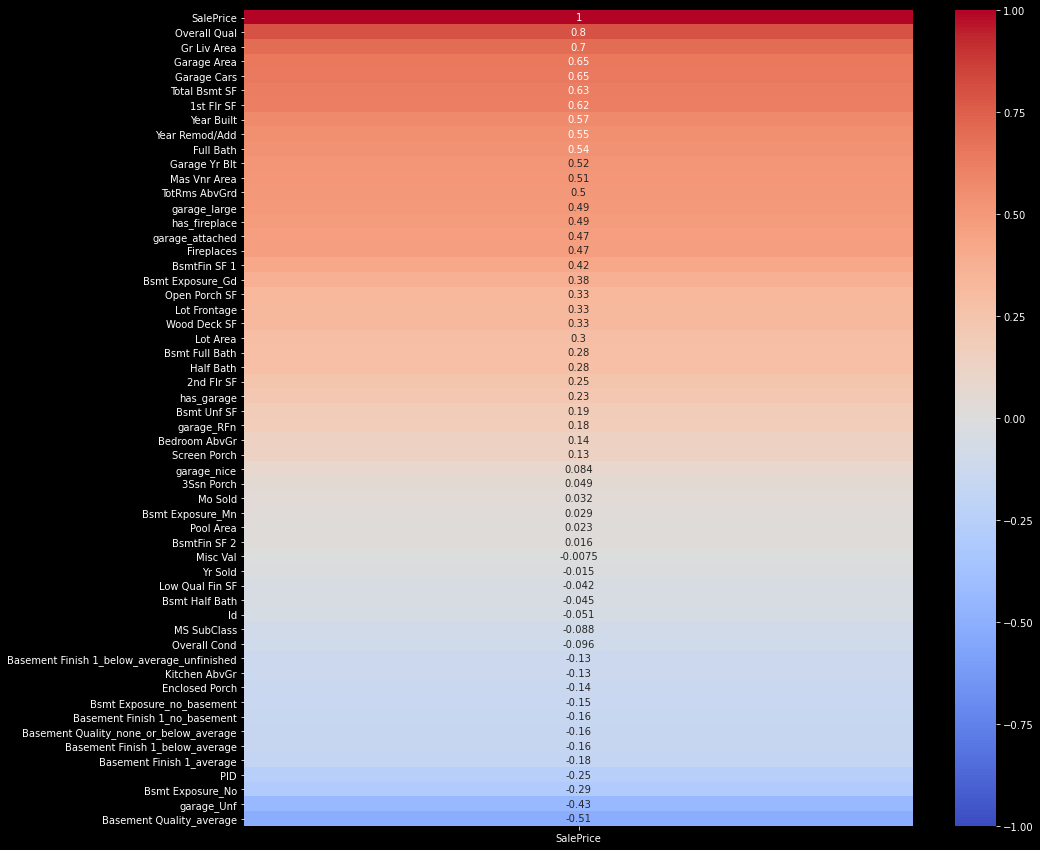

In [89]:
# checking this out for information's sake  

plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(15, 15))
plt.fontsize = 27
sns.heatmap(ames.corr()[['SalePrice']].sort_values('SalePrice', ascending = False),
            annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1);

#### **Building model** (garage + basement)

In [91]:
X = ames[num_garage_basement]
y = ames['SalePrice']

# train-test split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                   test_size=0.2,
                                                   random_state=42)

ss, X_train_sc, X_test_sc = standardize(X_train, X_test)

lr = LinearRegression()

In [92]:
lr.fit(X_train_sc, y_train)

LinearRegression()

#### **Scoring model** (garage + basement)

In [95]:
my_model_metrics(lr, X_train_sc, y_train)

R^2 = 0.8370826915121006
RMSE = 32159.253215493136


In [96]:
my_model_metrics(lr, X_test_sc, y_test)

R^2 = 0.8529700139032137
RMSE = 29702.815409039747


In [99]:
lr.score(X_train_sc, y_train)

0.8370826915121006

In [100]:
lr.score(X_test_sc, y_test)

0.8529700139032137

In [97]:
lr.intercept_

181996.92861500915

In [98]:
lr.coef_

array([ 11104.38347859,   -949.34553335,   5265.22934352,  13699.66308082,
         9062.28628227,  11208.11073408,   1286.48801663,   2066.08055353,
          135.51667357,   1263.14636428,    784.48931318,   5015.02303842,
        -3714.44027757,  21848.54771607,   6002.00324105,   4768.00941869,
         5552.91304658,   2104.52324589,  -2060.76963391,  -5628.59539661,
        29377.53355349,   4514.71211053,   3565.81070495,   1286.48801663,
        -7145.2467711 ,  -1613.22392692, -21101.43868909,   2188.09702481,
        -2610.23266982,  -2486.65098928,   1922.99215686,   3146.58855062,
         4692.36068997,  -1951.92621867,  -2719.94430415,  -1171.20115076,
        -1877.95884075,  -1740.36005088,  -3950.20787814,  -1239.58522989])

In [101]:
pd.DataFrame(list(zip(X_train.columns, lr.coef_)))

,0,1
0,Year Built,11104.383
1,BsmtFin SF 1,-949.346
2,Total Bsmt SF,5265.229
3,1st Flr SF,13699.663
4,2nd Flr SF,9062.286
5,Gr Liv Area,11208.111
6,Garage Area,1286.488
7,Wood Deck SF,2066.081
8,Open Porch SF,135.517
9,Enclosed Porch,1263.146


#### **Creating submission** (garage + basement)

In [102]:
ames_test['SalePrice_gb'] = lr.predict(ss.transform(ames_test[num_garage_basement]))
ames_test['SalePrice'] = ames_test['SalePrice_gb']
ames_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Basement Finish 1_below_average_unfinished,Basement Finish 1_no_basement,SalePrice_bl,SalePrice_fn,SalePrice,SalePrice_fd,SalePrice_fd_r,SalePrice_fd_lcv,SalePrice_gar,SalePrice_gb
0,2658,902301120,190,RM,69.000,9142,Pave,Grvl,Reg,Lvl,...,1,0,181534.626,140685.771,134794.784,130220.790,130244.537,130244.537,121461.322,134794.784
1,2718,905108090,90,RL,69.546,9662,Pave,NaN,IR1,Lvl,...,1,0,181534.626,225796.997,145879.429,155397.327,155263.984,155263.984,142258.354,145879.429
2,2414,528218130,60,RL,58.000,17104,Pave,NaN,IR1,Lvl,...,0,0,181534.626,194323.567,210857.024,219080.759,218830.587,218830.587,213582.491,210857.024
3,1989,902207150,30,RM,60.000,8520,Pave,NaN,Reg,Lvl,...,1,0,181534.626,128493.140,89780.102,115763.631,115728.891,115728.891,104641.907,89780.102
4,625,535105100,20,RL,69.546,9500,Pave,NaN,IR1,Lvl,...,0,0,181534.626,193068.456,182894.501,199359.211,199213.194,199213.194,185825.822,182894.501


In [103]:
submission_10 = ames_test[['Id', 'SalePrice']].copy()

In [105]:
submission_10.to_csv('../submissions/submission_10.csv', index=False)

In [106]:
submission_10.head()

,Id,SalePrice
0,2658,134794.784
1,2718,145879.429
2,2414,210857.024
3,1989,89780.102
4,625,182894.501


### Ridge, LASSO regressions using garage, garage + basement feature sets

#### _**Ridge Regression**_

#### **Building Ridge Model** (garage + basement)

In [107]:
X = ames[num_garage_basement]
y = ames['SalePrice']

# train-test split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                   test_size=0.2,
                                                   random_state=42)

ss, X_train_sc, X_test_sc = standardize(X_train, X_test)

ridge = Ridge()

In [108]:
ridge.fit(X_train_sc, y_train)

Ridge()

#### **Scoring Ridge Model** (garage + basement)

In [109]:
my_model_metrics(ridge, X_train_sc, y_train)

R^2 = 0.8370812957431888
RMSE = 32159.390974918893


In [110]:
my_model_metrics(ridge, X_test_sc, y_test)

R^2 = 0.8531822262309867
RMSE = 29681.372233258197


In [111]:
ridge.score(X_train_sc, y_train)

0.8370812957431888

In [113]:
ridge.score(X_test_sc, y_test)

0.8531822262309867

In [114]:
ridge.intercept_

181996.92861500915

In [115]:
ridge.coef_

array([ 11078.01208347,   -935.58528885,   5288.8302294 ,  13349.43932976,
         8725.39553748,  11587.40153028,   1345.08803836,   2066.01478428,
          137.7760175 ,   1255.97328684,    782.92000491,   5006.5111303 ,
        -3711.92221185,  21850.94393672,   5994.19014647,   4763.20918269,
         5549.34204076,   2109.11696973,  -2045.72984239,  -5615.14041011,
        29122.43517042,   4519.40255668,   3549.36114369,   1345.08803836,
        -7095.11210953,  -1596.85520102, -20971.20893212,   2179.10911945,
        -2620.25803326,  -2499.43041738,   1892.47047044,   3033.95563563,
         4700.59963084,  -1947.63775757,  -2723.07101086,  -1169.73799273,
        -1877.9197782 ,  -1737.52962957,  -3937.24110703,  -1128.58559156])

In [116]:
ridge_coef = pd.DataFrame(list(zip(X_train.columns, ridge.coef_)))
ridge_coef

,0,1
0,Year Built,11078.012
1,BsmtFin SF 1,-935.585
2,Total Bsmt SF,5288.830
3,1st Flr SF,13349.439
4,2nd Flr SF,8725.396
5,Gr Liv Area,11587.402
6,Garage Area,1345.088
7,Wood Deck SF,2066.015
8,Open Porch SF,137.776
9,Enclosed Porch,1255.973


In [117]:
ridge_coef.sort_values(by=1, ascending=False)

,0,1
20,Garage Cars,29122.435
13,Overall Qual,21850.944
3,1st Flr SF,13349.439
5,Gr Liv Area,11587.402
0,Year Built,11078.012
4,2nd Flr SF,8725.396
14,Overall Cond,5994.190
16,Full Bath,5549.342
2,Total Bsmt SF,5288.830
11,Screen Porch,5006.511


#### **Creating Ridge Model Submission** (garage + basement)

In [118]:
ames_test['SalePrice_gb_r'] = ridge.predict(ss.transform(ames_test[num_garage_basement]))
ames_test['SalePrice'] = ames_test['SalePrice_gb_r']
ames_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Basement Finish 1_no_basement,SalePrice_bl,SalePrice_fn,SalePrice,SalePrice_fd,SalePrice_fd_r,SalePrice_fd_lcv,SalePrice_gar,SalePrice_gb,SalePrice_gb_r
0,2658,902301120,190,RM,69.000,9142,Pave,Grvl,Reg,Lvl,...,0,181534.626,140685.771,134937.149,130220.790,130244.537,130244.537,121461.322,134794.784,134937.149
1,2718,905108090,90,RL,69.546,9662,Pave,NaN,IR1,Lvl,...,0,181534.626,225796.997,146108.498,155397.327,155263.984,155263.984,142258.354,145879.429,146108.498
2,2414,528218130,60,RL,58.000,17104,Pave,NaN,IR1,Lvl,...,0,181534.626,194323.567,210798.712,219080.759,218830.587,218830.587,213582.491,210857.024,210798.712
3,1989,902207150,30,RM,60.000,8520,Pave,NaN,Reg,Lvl,...,0,181534.626,128493.140,89860.871,115763.631,115728.891,115728.891,104641.907,89780.102,89860.871
4,625,535105100,20,RL,69.546,9500,Pave,NaN,IR1,Lvl,...,0,181534.626,193068.456,182920.826,199359.211,199213.194,199213.194,185825.822,182894.501,182920.826


In [119]:
submission_11 = ames_test[['Id', 'SalePrice']].copy()

In [121]:
submission_11.to_csv('../submissions/submission_11.csv', index=False)
submission_11.head()

,Id,SalePrice
0,2658,134937.149
1,2718,146108.498
2,2414,210798.712
3,1989,89860.871
4,625,182920.826


_**^^^ This ridge regressor with numeric, garage-related, and basement-related columns included is the model with best RMSE score according to the Kaggle competition.**_ 

#### _**LASSO Regression**_

#### **Building Lasso Model** (garage + basement)

In [125]:
# X, Y defined above

# Set up a list of Lasso alphas to check.
l_alphas = np.logspace(-3, 0 , 100)

# Cross-validate over our list of Lasso alphas.
lasso_cv = LassoCV(alphas=l_alphas, cv=5)

# Fit model using best ridge alpha!
lasso_cv.fit(X_train_sc, y_train)

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28358881076.533936, tolerance: 814202342.8255352
  model = cd_fast.enet_coordinate_descent_gram(
/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28335145529.565186, tolerance: 814202342.8255352
  model = cd_fast.enet_coordinate_descent_gram(
/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28314144937.81006, tolerance: 814202342.8255352
  model = cd_fast.enet_coordinate_descent_gram(
/Users/emilynaftalin/opt/anacond

LassoCV(alphas=array([0.001     , 0.00107227, 0.00114976, 0.00123285, 0.00132194,
       0.00141747, 0.00151991, 0.00162975, 0.00174753, 0.00187382,
       0.00200923, 0.00215443, 0.00231013, 0.00247708, 0.00265609,
       0.00284804, 0.00305386, 0.00327455, 0.00351119, 0.00376494,
       0.00403702, 0.00432876, 0.00464159, 0.00497702, 0.0053367 ,
       0.00572237, 0.00613591, 0.00657933, 0.0070548 , 0.00756463,
       0.008...
       0.09326033, 0.1       , 0.10722672, 0.1149757 , 0.12328467,
       0.13219411, 0.14174742, 0.15199111, 0.16297508, 0.17475284,
       0.18738174, 0.2009233 , 0.21544347, 0.23101297, 0.24770764,
       0.26560878, 0.28480359, 0.30538555, 0.32745492, 0.35111917,
       0.37649358, 0.40370173, 0.43287613, 0.46415888, 0.49770236,
       0.53366992, 0.57223677, 0.61359073, 0.65793322, 0.70548023,
       0.75646333, 0.81113083, 0.869749  , 0.93260335, 1.        ]),
        cv=5)

#### **Scoring Lasso Model** (garage + basement)

In [126]:
lasso_cv.intercept_

181996.92861500915

In [127]:
lasso_cv.coef_

array([ 11094.29165054,   -939.83751615,   5259.39157948,  13643.25229645,
         9001.77389341,  11270.97673259,  46291.70047827,   2065.05322033,
          136.26096651,   1260.12127852,    783.51296196,   5013.24391466,
        -3712.99874948,  21855.16962865,   5999.56204023,   4767.45516845,
         5552.739984  ,   2104.31626077,  -2056.66041344,  -5626.99718147,
        29375.26991002,   4513.98817533,   3565.71282315, -43714.71123927,
        -7145.1939113 ,  -1608.91352632, -21099.84675235,   2186.13211471,
        -2608.17460018,  -2484.09119644,   1913.32292373,   3053.48453237,
         4692.91449973,  -1949.33178844,  -2716.75361728,  -1170.54760541,
        -1872.11829999,  -1734.71698499,  -3941.25081844,  -1146.78213478])

In [128]:
pd.DataFrame(list(zip(X_train.columns, lasso_cv.coef_)))

,0,1
0,Year Built,11094.292
1,BsmtFin SF 1,-939.838
2,Total Bsmt SF,5259.392
3,1st Flr SF,13643.252
4,2nd Flr SF,9001.774
5,Gr Liv Area,11270.977
6,Garage Area,46291.700
7,Wood Deck SF,2065.053
8,Open Porch SF,136.261
9,Enclosed Porch,1260.121


In [129]:
lasso_cv.score(X_train_sc, y_train)

0.8370826388773375

In [130]:
lasso_cv.score(X_test_sc, y_test)

0.8529688952745476

In [135]:
my_model_metrics(lasso_cv, X_train_sc, y_train)

R^2 = 0.8370826388773375
RMSE = 32159.25841044312


In [136]:
my_model_metrics(lasso_cv, X_test_sc, y_test)

R^2 = 0.8529688952745476
RMSE = 29702.928400812612


#### **Creating Submission for Lasso Model** (garage + basement)

In [131]:
ames_test['SalePrice_gb_lcv'] = lasso_cv.predict(ss.transform(ames_test[num_garage_basement]))
ames_test['SalePrice'] = ames_test['SalePrice_gb_lcv']
ames_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,SalePrice_bl,SalePrice_fn,SalePrice,SalePrice_fd,SalePrice_fd_r,SalePrice_fd_lcv,SalePrice_gar,SalePrice_gb,SalePrice_gb_r,SalePrice_gb_lcv
0,2658,902301120,190,RM,69.000,9142,Pave,Grvl,Reg,Lvl,...,181534.626,140685.771,134797.797,130220.790,130244.537,130244.537,121461.322,134794.784,134937.149,134797.797
1,2718,905108090,90,RL,69.546,9662,Pave,NaN,IR1,Lvl,...,181534.626,225796.997,145894.886,155397.327,155263.984,155263.984,142258.354,145879.429,146108.498,145894.886
2,2414,528218130,60,RL,58.000,17104,Pave,NaN,IR1,Lvl,...,181534.626,194323.567,210832.998,219080.759,218830.587,218830.587,213582.491,210857.024,210798.712,210832.998
3,1989,902207150,30,RM,60.000,8520,Pave,NaN,Reg,Lvl,...,181534.626,128493.140,89795.167,115763.631,115728.891,115728.891,104641.907,89780.102,89860.871,89795.167
4,625,535105100,20,RL,69.546,9500,Pave,NaN,IR1,Lvl,...,181534.626,193068.456,182895.907,199359.211,199213.194,199213.194,185825.822,182894.501,182920.826,182895.907


In [132]:
submission_12 = ames_test[['Id', 'SalePrice']].copy()

In [134]:
submission_12.to_csv('../submissions/submission_12.csv', index=False)
submission_12.head()

,Id,SalePrice
0,2658,134797.797
1,2718,145894.886
2,2414,210832.998
3,1989,89795.167
4,625,182895.907
